# Logistic Regression VS Neural Network
---

In this project, we are going to be building a logistic regression and a neural network from scratch to predict whether someone has diabetes or not, and comparing the performance between the two models.

In [1]:
import numpy as np                                  # import numpy and plotting libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings                                     # Avoid warnings in output
np.random.seed(101)
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})       # Better plot resolution
sns.set_context('notebook', font_scale= 0.7)

## 1. Logistic Regression
### 1.1 Defining functions

We will get started with our logistic regression. First, we have to define our functions. We are going to start with our sigmoid function, which will transform our input into a number between 0 and 1, which we need to classify whether someone has diabetes (1) or not (0).

In [2]:
def sigmoid(z):                                                     # sigmoid function
    return 1 / (1 + np.exp(-z))

Our equation is z = b + wx, which will be input into the above sigmoid function to  produce y_hat.

Then, we will define our loss function, with the objective to minimize it and find optimal weights (w) and bias (b). Our loss function will be a Binary Cross-Entropy Loss function. We then take the derivative with respect to w and b to find the gradients.

In [3]:
def loss(y, y_hat):                                                 # cost function to minimize
    loss = -np.mean(y*(np.log(y_hat)) - (1 - y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    m = X.shape[0]                                                  # number of training examples.

    dw = (1/m)*np.dot(X.T, (y_hat - y))                             # Gradient of loss w.r.t weights.
    
    db = (1/m)*np.sum((y_hat - y))                                  # Gradient of loss w.r.t bias.
    
    return dw, db

With all our essential functions marked down, we will create a training function to train our logistic regression based on the data we have. It will train a number of batches for a number of epochs as stated by the user. We will first normalize our features, and procceed to train our model. We input the dot product of the weights and the features plus the bias, and input that into the sigmoid function to get y_hat. Then, based on an established learning rate and the loss gradients, we update the weights and bias in each epoch.

In [4]:
def normalize(X):
    m, n = X.shape
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def train(X, y, bs, epochs, lr):                                    # bs = batch size, lr = learning rate
    m, n = X.shape

    w = np.zeros((n,1))                                             # Initializing weights and bias to zeros.
    b = 0
    
    y = y.reshape(m,1)
    
    X = normalize(X)                                                # Normalizing the inputs.

    losses = []

    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
                                                                    # Defining batches.
            start_i = i*bs          
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            y_hat = sigmoid(np.dot(xb, w) + b)                      # Calculating hypothesis.
            
            dw, db = gradients(xb, yb, y_hat)                       # Getting the gradients of loss w.r.t parameters.
            
            w -= lr*dw                                              # Updating the parameters.
            b -= lr*db
                                  
        l = loss(y, sigmoid(np.dot(X, w) + b))                      # Calculating cost and appending it in the list.
        losses.append(l)

    return w, b, losses

Finally, we make a function to predict the output of our specific input based on the paremeters of our function after training.

In [5]:
def lr_predict(X, w, b):
    pred_class = []
    X = normalize(X)
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

### 1.2 Training and Testing

Let's import our data and divide it into the features (X) and the target values (y), and create our randomizd train-test (75-25) split and procceed to train our model.

In [6]:
mat = np.loadtxt(open("diabetes.csv", "rb"), delimiter=",")
np.random.shuffle(mat)
y = mat[:, -1]
X = mat[:,:-1]
y_train = y[:int(y.shape[0]*0.75)]
X_train = X[:int(y.shape[0]*0.75), :]
y_test = y[int(y.shape[0]*0.75):]
X_test = X[int(y.shape[0]*0.75):, :]

In [7]:
np.shape(y_train)

(576,)

In [8]:
np.shape(y_test)

(192,)

In [9]:
w, b, losses = train(X_train, y_train, bs = 100, epochs = 1000, lr = 0.001)

The last part of our logistic regression section will be to assess its accuracy and print the weights for each feature.

In [10]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

acc1 = 100 * np.round(accuracy(y_test, y_hat=lr_predict(X_test, w, b)), 4)
               
print(f'Our Logistic Regression model predicts with a {acc1}% accuracy.')

Our Logistic Regression model predicts with a 76.03999999999999% accuracy.


In [11]:
print(f'The weights for each feature are: \n {w}')

The weights for each feature are: 
 [[ 0.26817059]
 [ 0.61156997]
 [-0.03283376]
 [ 0.06093418]
 [ 0.08639569]
 [ 0.37221226]
 [ 0.23197439]
 [ 0.19135003]]


## 2. Neural Network

### 2.1 Defining Functions and initializing parameters

Let's start once again with our sigmoid function. We will define a function for sigmoid derivative for later use.

In [12]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

The architecture of our neural network will have 8 features as input, one hidden layer with 3 neurons, and one final output.

In [13]:
input_size = 8  # Number of features in the input
hidden_size = 3  # Number of neurons in the hidden layer
output_size = 1  # Number of neurons in the output layer

We will initialize our matrices of weights and biases for both the hidden layer and the output layer.

In [14]:
w_in_to_h = np.random.randn(input_size, hidden_size)  #8x3 random matrix of the weights from the input layer to the hidden layer
w_h_to_out = np.random.randn(hidden_size, output_size) #3x1 random matrix of the weights from the hidden layer to the output layer

b_h = np.zeros((1, hidden_size)) # vector of zeroes to initialize the hidden layer biases
b_out = np.zeros((1, output_size)) # vector of zeroes to initialize the output layer biases

Now, we will define our Forward Propagation function, which will calculate our z = wx + b and input it into our sigmoid on each layer once, starting from the input layer to the output layer.

In [15]:
def forward_propagation(X):
    z_h = np.dot(X, w_in_to_h) + b_h   #768x3
    a_h = sigmoid(z_h)

    z_out = np.dot(a_h, w_h_to_out) + b_out #768x1
    a_out = sigmoid(z_out) 
    
    return a_h, a_out

Our final result will be a on each layer. Our output layer a will hold, after the later steps of training, our predicted target values (or y_hat, if we want to compare to the LogReg notation we used). Now, let's build our backpropagation function, which will propagate our output backwards to find the gradients, and then procceed to use those gradients and  our learning rate to update our weights and biases in each iteration.

In [16]:
def backpropagation(X, Y, a_h, a_out):
    dz_out = a_out - np.reshape(Y, (len(Y), 1))
    dw_out = np.dot(a_h.T, dz_out)
    db_out = np.sum(dz_out, axis=0, keepdims=True)

    dz_h = np.dot(dz_out, w_h_to_out.T) * sigmoid_derivative(a_h)
    dw_h = np.dot(X.T, dz_h)
    db_h = np.sum(dz_h, axis=0, keepdims=True)

    return dw_h, db_h, dw_out, db_out       # Our resulting gradient vectors

In [17]:
def update_parameters(dw_h, db_h, dw_out, db_out, lr):          # lr = learning rate
    global w_in_to_h, b_h, w_h_to_out, b_out

    w_in_to_h -= lr * dw_h
    b_h -= lr * db_h

    w_h_to_out -= lr * dw_out
    b_out -= lr * db_out

Our training algorithm is as follows:

In [18]:
def train(X, Y, epochs, lr):
    X = normalize(X)
    error_list = []                 # To capture error and accuracy in each epoch for  later use
    accuracy_list = []
    for epoch in range(epochs):
        # Forward propagation
        a_h, a_out = forward_propagation(X)     

        # Compute loss and accuracy and save to lists
        loss = np.mean((np.reshape(Y, (len(Y), 1)) - (a_out > 0.5))**2)     # Mean squared error
        error_list.append(loss)

        accuracy_list.append(accuracy(np.reshape(Y, (len(Y), 1)), (a_out > 0.5))) #set treshold for output classification

        # Backpropagation
        dw_h, db_h, dw_out, db_out = backpropagation(X, Y, a_h, a_out)

        # Update parameters
        update_parameters(dw_h, db_h, dw_out, db_out, lr)
    
    return accuracy_list, error_list, w_in_to_h, w_h_to_out, b_h, b_out


### 2.2 Training and Testing

This is the training part of the procedure. We will use the same amount of epochs and the same learning rate as in Logistic Regression, and leverage the data (X and y) we used there as well.

In [19]:
accuracy_list, error_list, w_in_to_h, w_h_to_out, b_h, b_out = train(X_train, y_train, epochs=1000, lr=0.001)

Below we also have plots of how accuracy and error improve with each training cycle.

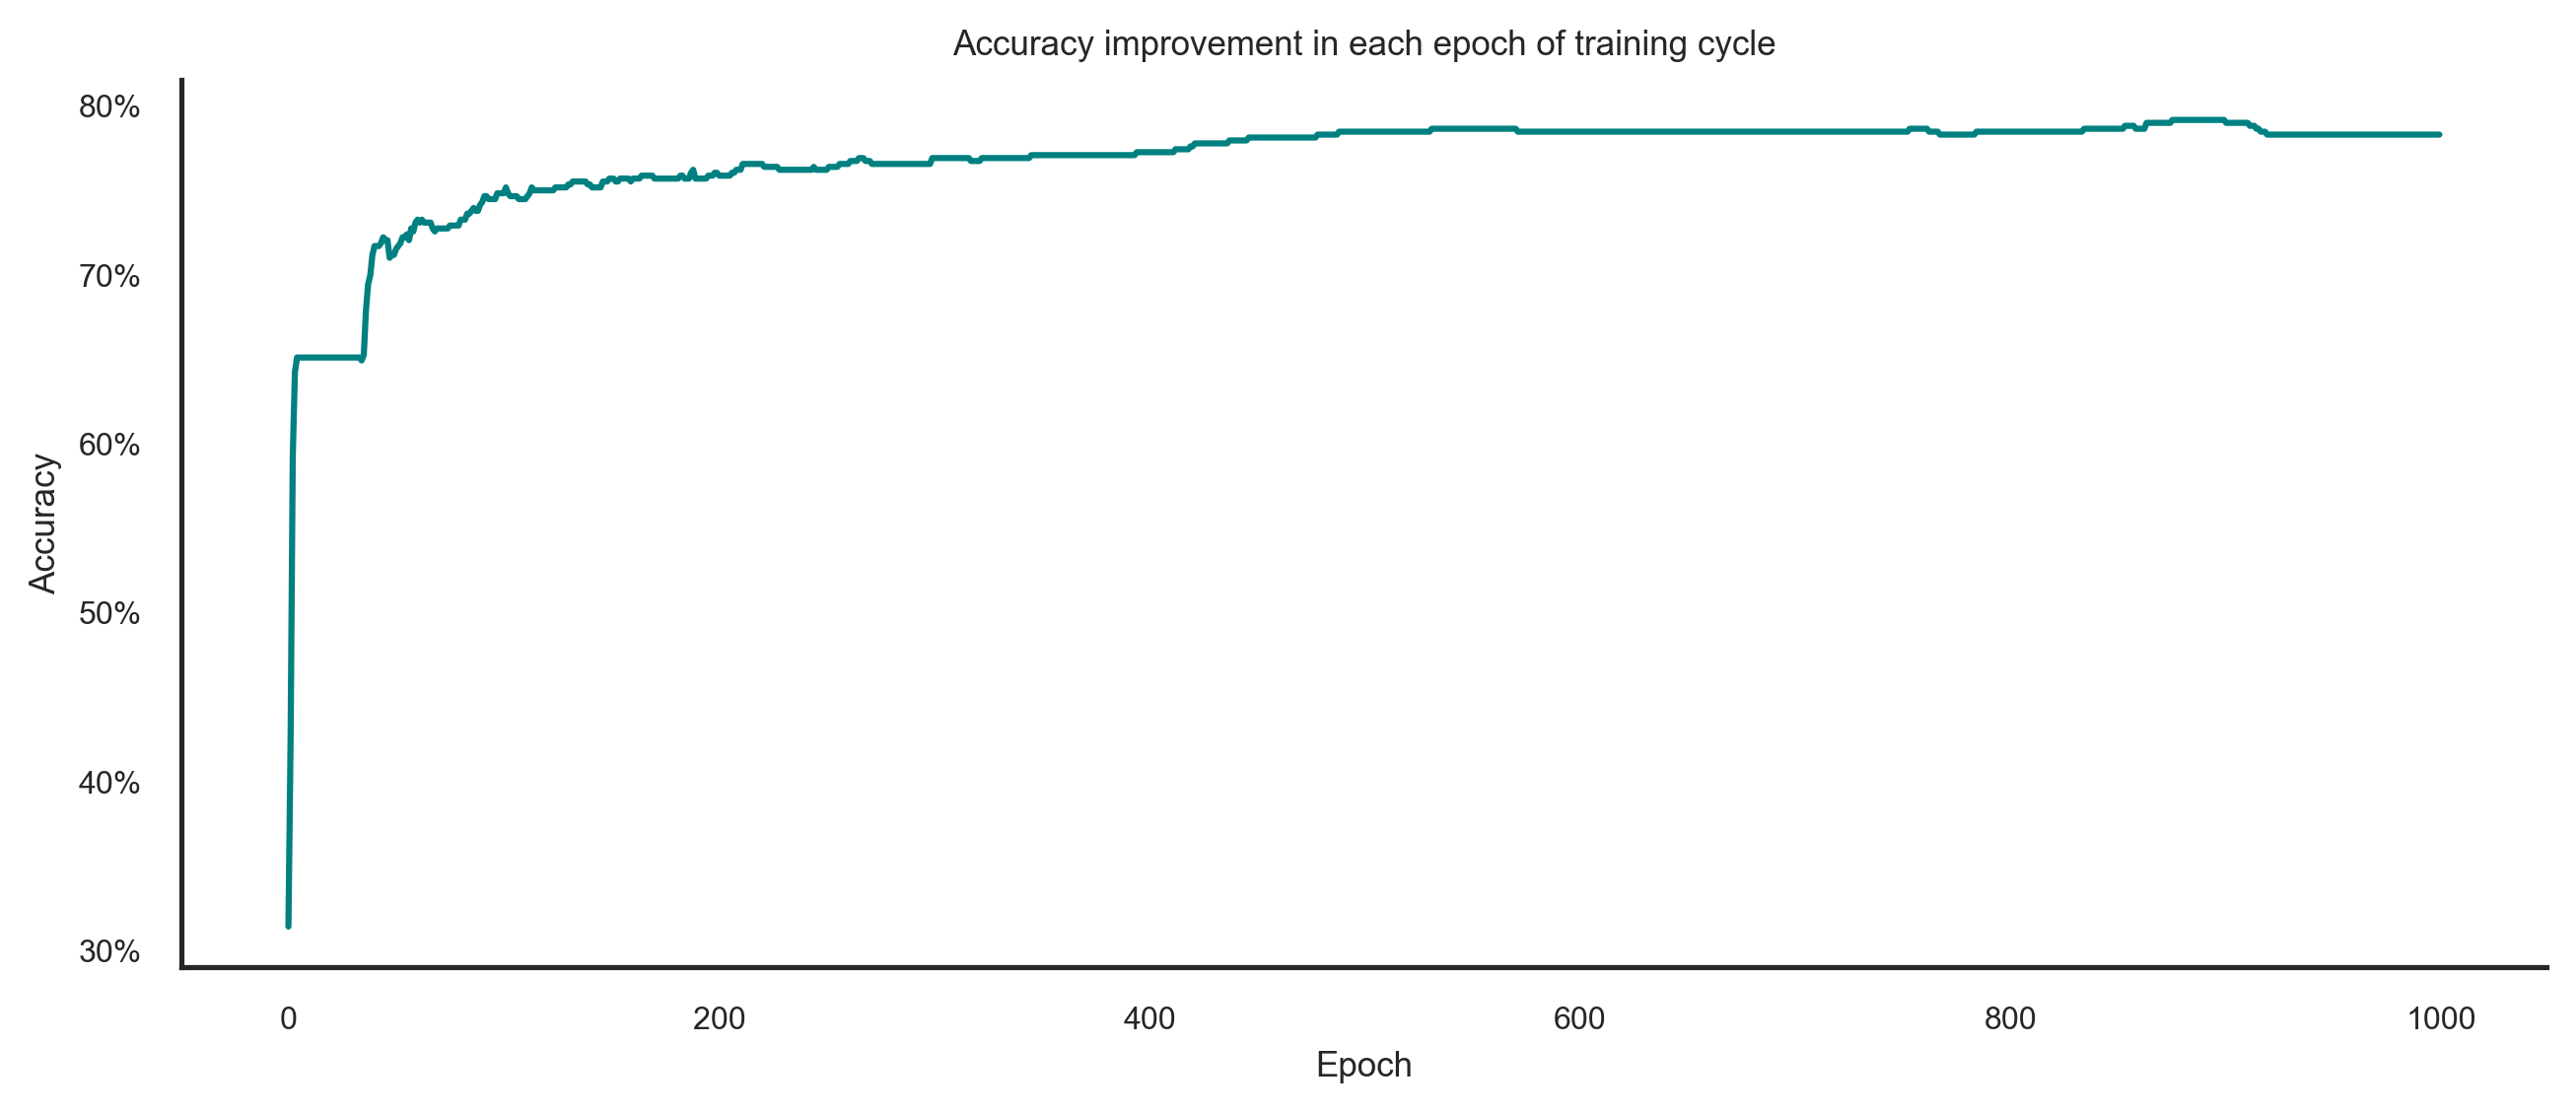

In [20]:
sns.set_style('white')
fig = plt.figure(figsize = (8, 3))
ax = fig.add_axes([0, 0, 1, 1])
sns.lineplot(accuracy_list, color = 'teal')
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_title("Accuracy improvement in each epoch of training cycle")
sns.despine()

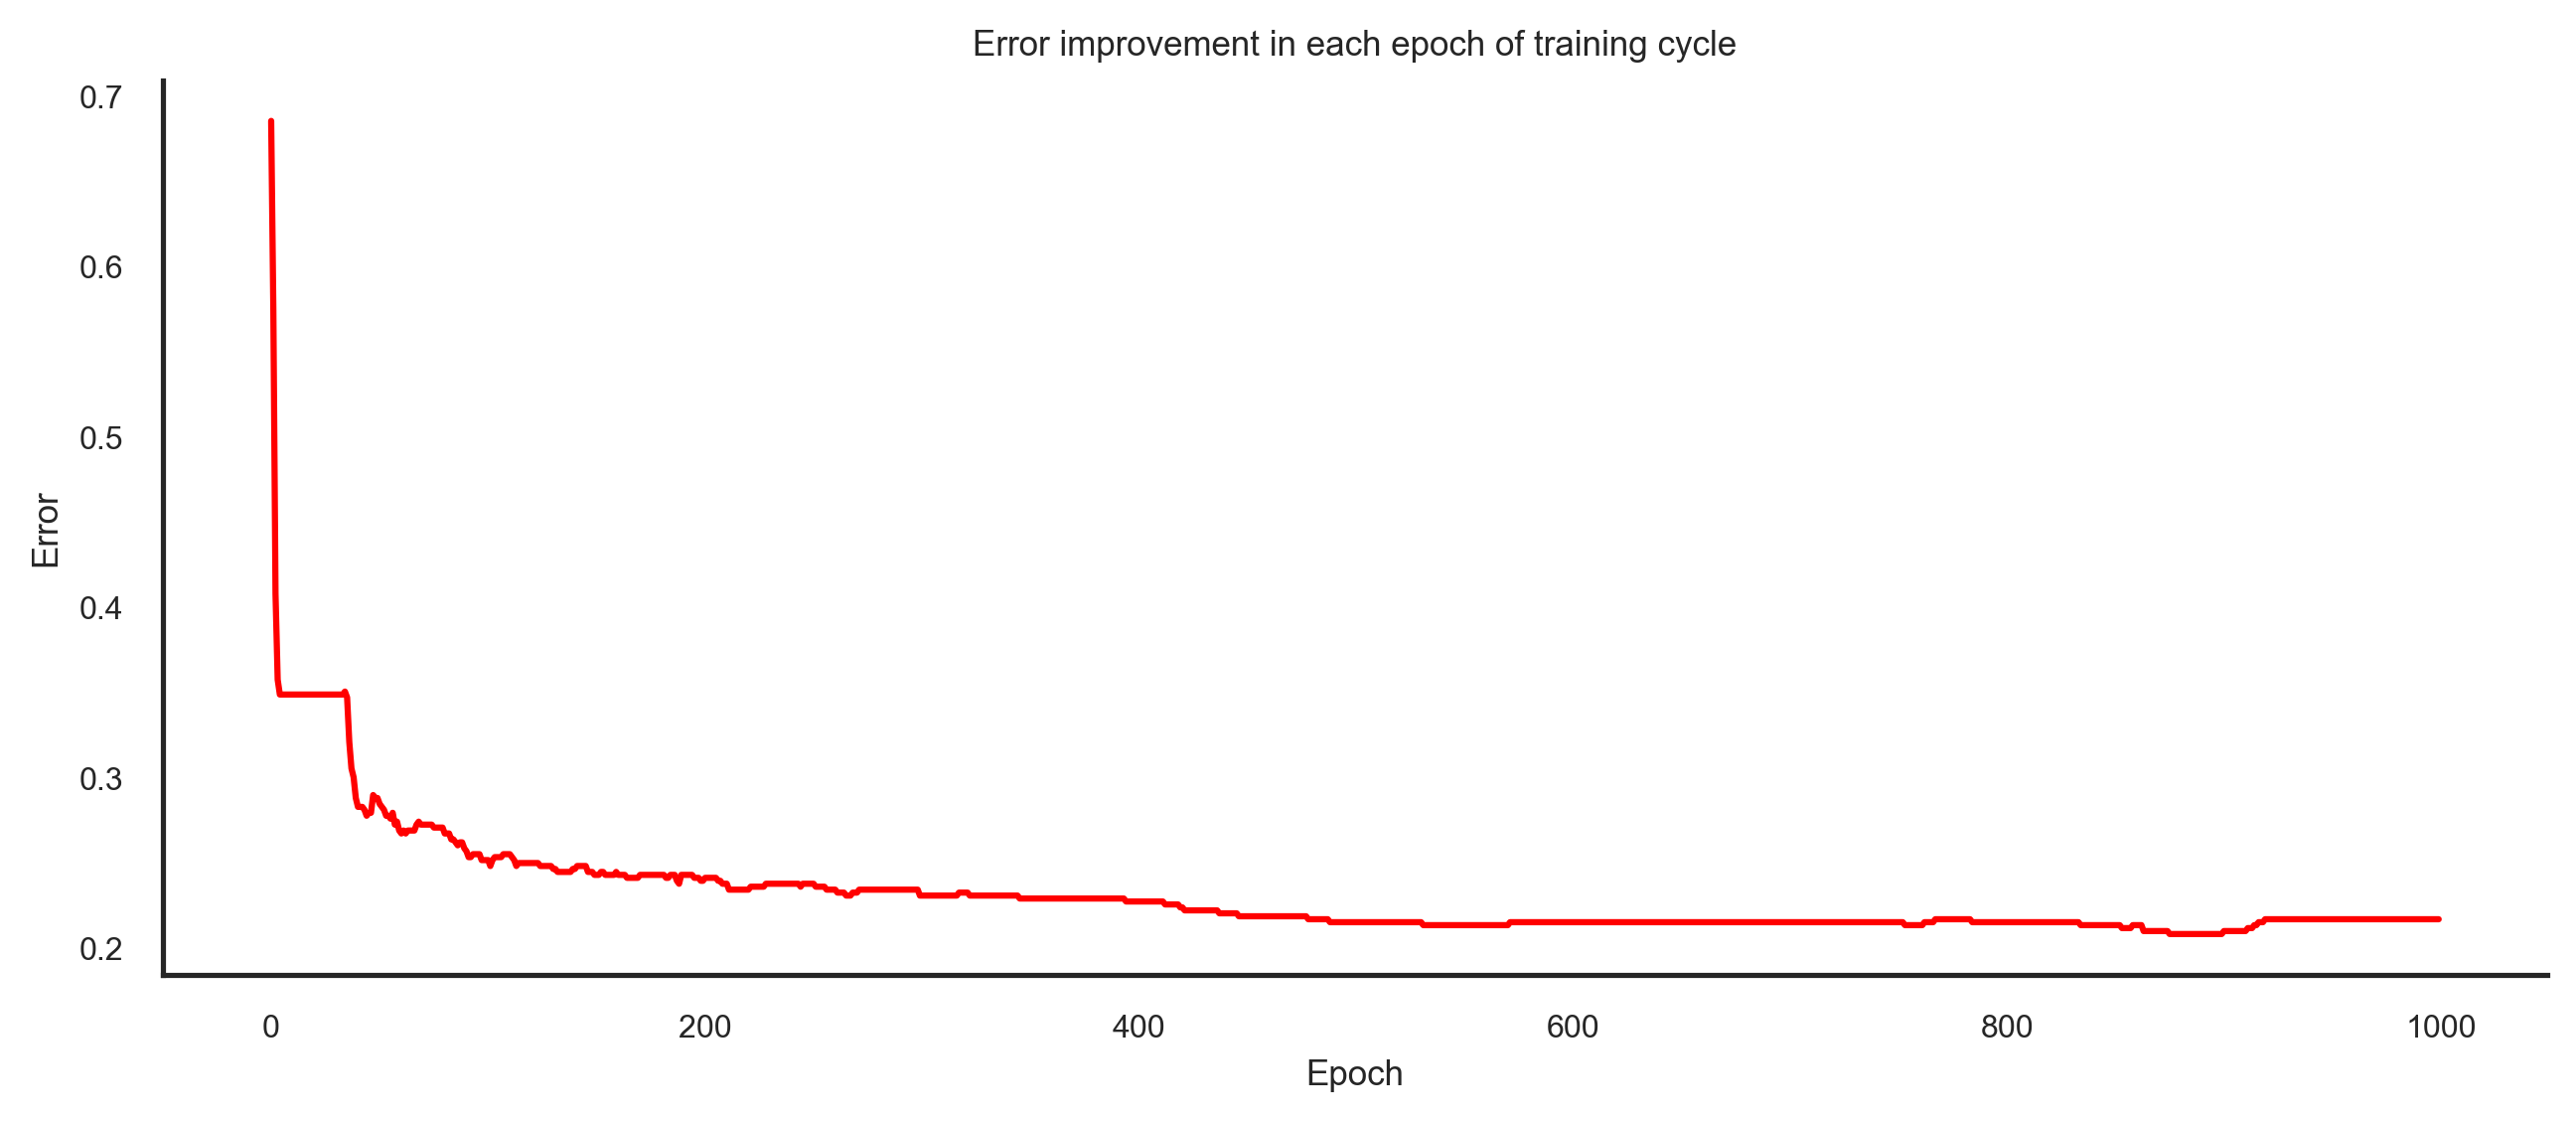

In [21]:
sns.set_style('white')
fig = plt.figure(figsize = (8, 3))
ax = fig.add_axes([0, 0, 1, 1])
sns.lineplot(error_list, color = 'red')
ax.set_ylabel('Error')
ax.set_xlabel('Epoch')
ax.set_title("Error improvement in each epoch of training cycle")
sns.despine()

Finally, we will report the model's accuracy on the test set, as well as the final weights and biases.

In [22]:
def NN_predict(X):
    X = normalize(X)
    _, a_out = forward_propagation(X)
    predictions = (a_out > 0.5)  # Apply threshold
    return predictions

acc2 = 100 * np.round(accuracy(y_test.reshape(len(y_test), 1), y_hat=NN_predict(X_test)), 4)
print(f'Our Neural Network predicts with {acc2}% accuracy.')

Our Neural Network predicts with 77.60000000000001% accuracy.


Our neural network performed just a little bit better than our Logistic Regression. These are the weights and biases.

In [23]:
print(f"Weights in the hidden layer: \n {w_in_to_h} \nBiases in the hidden layer: \n {b_h} \nWeights in the output layer: \n {w_h_to_out} \nBias in the output layer: \n {b_out}")

Weights in the hidden layer: 
 [[ 1.44917349 -1.72635312 -1.86753178]
 [ 1.61561829 -5.81363405 -6.95368494]
 [-0.99756984  0.36644975  1.07350237]
 [ 0.5741439   0.16658505 -0.45510196]
 [-0.93219074 -1.22505107 -0.49976933]
 [ 1.49298282 -3.15308966 -4.32198068]
 [ 0.39098472 -1.3243359  -3.9832906 ]
 [ 1.72562577 -0.1645356   0.83764159]] 
Biases in the hidden layer: 
 [[-0.11435806  0.00883908  0.15550254]] 
Weights in the output layer: 
 [[ 1.26203375]
 [-0.80686154]
 [-1.47736931]] 
Bias in the output layer: 
 [[-0.18606915]]
